In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from datetime import datetime
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('base_pronta_agosto.xlsx')

In [5]:
df.head()

,data_hora,ligacoes_recebidas,ligacoes_atendidas
0,2021-08-01 08:00:00,1,1
1,2021-08-01 08:30:00,3,3
2,2021-08-01 09:00:00,4,4
3,2021-08-01 09:30:00,6,6
4,2021-08-01 10:00:00,9,9


In [6]:
#confirmando o formato dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_hora           893 non-null    datetime64[ns]
 1   ligacoes_recebidas  893 non-null    int64         
 2   ligacoes_atendidas  893 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 21.1 KB


In [7]:
#verificando se o df possui algum index já
df.index

RangeIndex(start=0, stop=893, step=1)

In [8]:
#indexando a coluna df para utilização no time series
df.set_index('data_hora', inplace=True)

In [9]:
df.index

DatetimeIndex(['2021-08-01 08:00:00', '2021-08-01 08:30:00',
               '2021-08-01 09:00:00', '2021-08-01 09:30:00',
               '2021-08-01 10:00:00', '2021-08-01 10:30:00',
               '2021-08-01 11:00:00', '2021-08-01 11:30:00',
               '2021-08-01 12:00:00', '2021-08-01 12:30:00',
               ...
               '2021-08-31 17:30:00', '2021-08-31 18:00:00',
               '2021-08-31 18:30:00', '2021-08-31 19:00:00',
               '2021-08-31 19:30:00', '2021-08-31 20:00:00',
               '2021-08-31 20:30:00', '2021-08-31 21:00:00',
               '2021-08-31 21:30:00', '2021-08-31 22:00:00'],
              dtype='datetime64[ns]', name='data_hora', length=893, freq=None)

array([[<AxesSubplot:title={'center':'ligacoes_recebidas'}>,
        <AxesSubplot:title={'center':'ligacoes_atendidas'}>]],
      dtype=object)

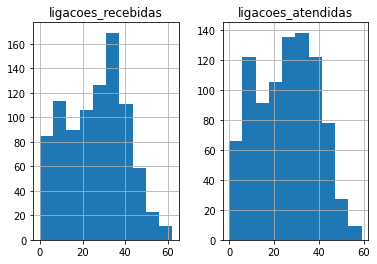

In [10]:
df.hist()

In [11]:
#verificando o df depois do tratamento 
df.head()

,ligacoes_recebidas,ligacoes_atendidas
data_hora,,
2021-08-01 08:00:00,1,1
2021-08-01 08:30:00,3,3
2021-08-01 09:00:00,4,4
2021-08-01 09:30:00,6,6
2021-08-01 10:00:00,9,9


In [23]:
#criação da série temporal ts
ts = df['ligacoes_recebidas']
ts

data_hora
2021-08-01 08:00:00     1
2021-08-01 08:30:00     3
2021-08-01 09:00:00     4
2021-08-01 09:30:00     6
2021-08-01 10:00:00     9
                       ..
2021-08-31 20:00:00    35
2021-08-31 20:30:00    23
2021-08-31 21:00:00    24
2021-08-31 21:30:00    19
2021-08-31 22:00:00     5
Name: ligacoes_recebidas, Length: 893, dtype: int64

In [24]:
print(ts)

data_hora
2021-08-01 08:00:00     1
2021-08-01 08:30:00     3
2021-08-01 09:00:00     4
2021-08-01 09:30:00     6
2021-08-01 10:00:00     9
                       ..
2021-08-31 20:00:00    35
2021-08-31 20:30:00    23
2021-08-31 21:00:00    24
2021-08-31 21:30:00    19
2021-08-31 22:00:00     5
Name: ligacoes_recebidas, Length: 893, dtype: int64


In [13]:
# Visualização por ano
ts['2021']

data_hora
2021-08-01 08:00:00     1
2021-08-01 08:30:00     3
2021-08-01 09:00:00     4
2021-08-01 09:30:00     6
2021-08-01 10:00:00     9
                       ..
2021-08-31 20:00:00    35
2021-08-31 20:30:00    23
2021-08-31 21:00:00    24
2021-08-31 21:30:00    19
2021-08-31 22:00:00     5
Name: ligacoes_recebidas, Length: 893, dtype: int64

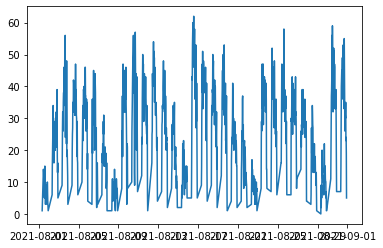

In [14]:
# Visualização da série temporal completa
plt.plot(ts)

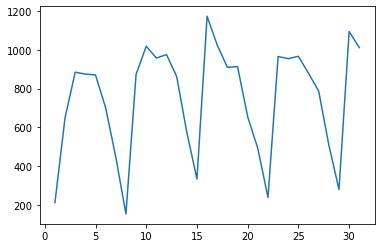

In [15]:
# Visualização por dia
ts_dia = ts.groupby([lambda x: x.day]).sum()
plt.plot(ts_dia)

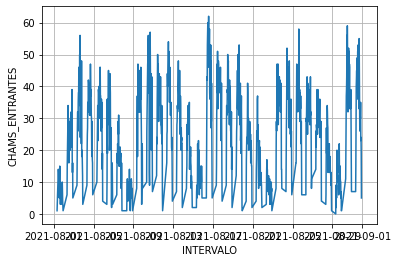

In [16]:
# plotar gráfico da série completa
plt.plot(df.index, df.ligacoes_recebidas)
plt.xlabel('INTERVALO', fontsize = 10)
plt.ylabel('CHAMS_ENTRANTES',fontsize = 10)
plt.grid()

#aqui já da para perceber se a série é estacionária ou não 
#analisar presença de tendência (mudanças na média) 
#sazonalidade, qual período possui mais ligações 

### Decomposição

In [15]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts, period=29, extrapolate_trend='freq')

In [16]:
tendencia = decomposicao.trend
tendencia

data_hora
2021-08-01 08:00:00    -1.307253
2021-08-01 08:30:00    -0.749992
2021-08-01 09:00:00    -0.192730
2021-08-01 09:30:00     0.364532
2021-08-01 10:00:00     0.921794
                         ...    
2021-08-31 20:00:00    34.208171
2021-08-31 20:30:00    34.109767
2021-08-31 21:00:00    34.011364
2021-08-31 21:30:00    33.912961
2021-08-31 22:00:00    33.814557
Name: trend, Length: 893, dtype: float64

In [17]:
sazonal = decomposicao.seasonal
sazonal

data_hora
2021-08-01 08:00:00     3.487768
2021-08-01 08:30:00     4.961449
2021-08-01 09:00:00     6.880069
2021-08-01 09:30:00     6.191348
2021-08-01 10:00:00     8.820758
                         ...    
2021-08-31 20:00:00    -1.750216
2021-08-31 20:30:00    -2.664728
2021-08-31 21:00:00    -5.270007
2021-08-31 21:30:00   -10.310214
2021-08-31 22:00:00   -16.250310
Name: seasonal, Length: 893, dtype: float64

In [18]:
aleatorio = decomposicao.resid
aleatorio

data_hora
2021-08-01 08:00:00    -1.180515
2021-08-01 08:30:00    -1.211458
2021-08-01 09:00:00    -2.687339
2021-08-01 09:30:00    -0.555880
2021-08-01 10:00:00    -0.742551
                         ...    
2021-08-31 20:00:00     2.542045
2021-08-31 20:30:00    -8.445040
2021-08-31 21:00:00    -4.741357
2021-08-31 21:30:00    -4.602746
2021-08-31 22:00:00   -12.564247
Name: resid, Length: 893, dtype: float64

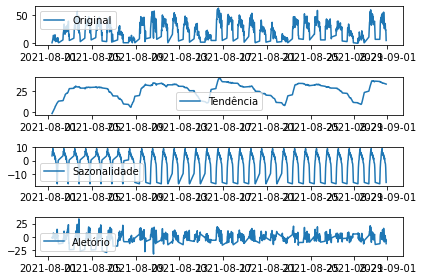

In [19]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade (flutuações perí) - ela está assim pq a sazonalidade é diária, então o gráfico fica 'apertado' para mostrar essa flutuação
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

#### Teste de estacionariedade

- H0: a base de dados é não estacionária
- H1: a base de dados é estacionária

Rejeição de H0: p-value menor que 0.05

Quanto mais negativo o valor de ADF, maior é a probabilidade de rejeitar H0

In [20]:
#testando a estacinariedade de Fuller 
test_estacionariedade = adfuller(df['ligacoes_recebidas'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
    output['Valor crítico(%s)' %key] = value
print(output)

#série estacionária

Teste                          -6.934197e+00
p-valor                         1.064979e-09
Lags                            4.000000e+00
Número de observações usadas    8.880000e+02
Valor crítico(1%)              -3.437735e+00
Valor crítico(5%)              -2.864800e+00
Valor crítico(10%)             -2.568506e+00
dtype: float64


#### Teste KPSS

- H0: a série é estacionária
- H1: a série é não estacionária

Rejeição de H0: p-value menor que 0.05

In [21]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(ts)

KPSS Statistic: 0.11886940904573268
p-value: 0.1
num lags: 21
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


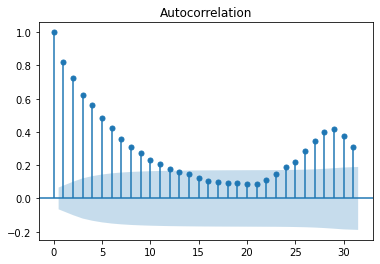

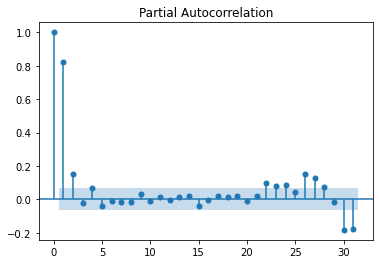

In [22]:
# Verificando as funções ACF e PACF para construção dos modelos
acf = plot_acf(ts, lags = 31)
pacf = plot_pacf(ts, lags = 31)

#a cada 29 dias os valores possuem uma autocorrelação grande, o que indica início e fim da sazonalidade

#### Teste com moving average

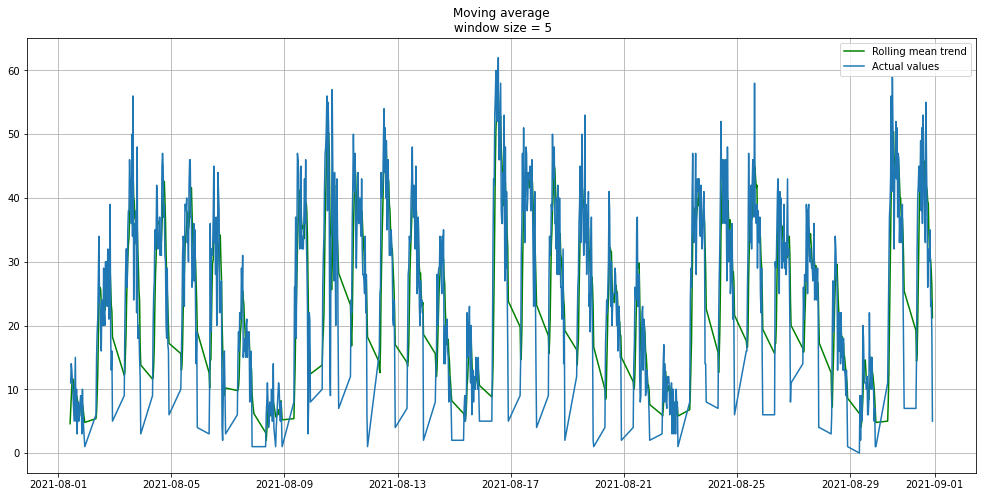

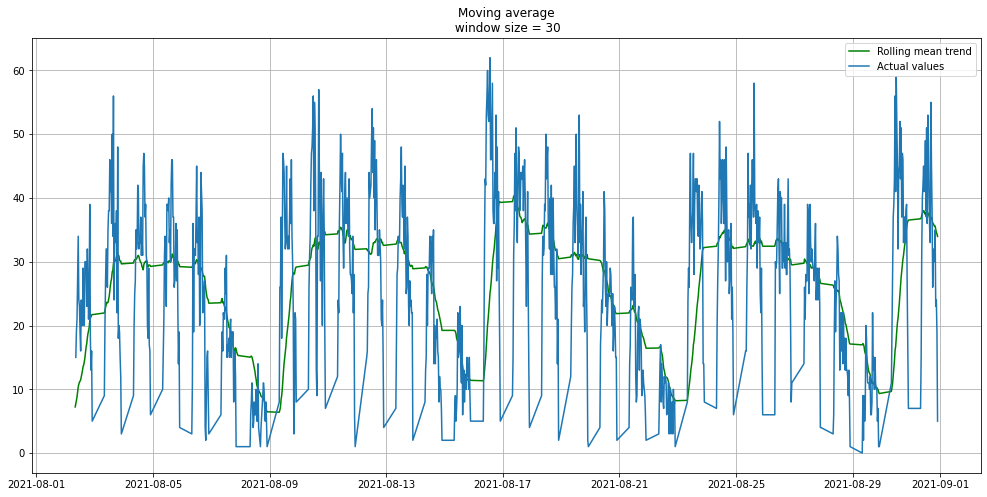

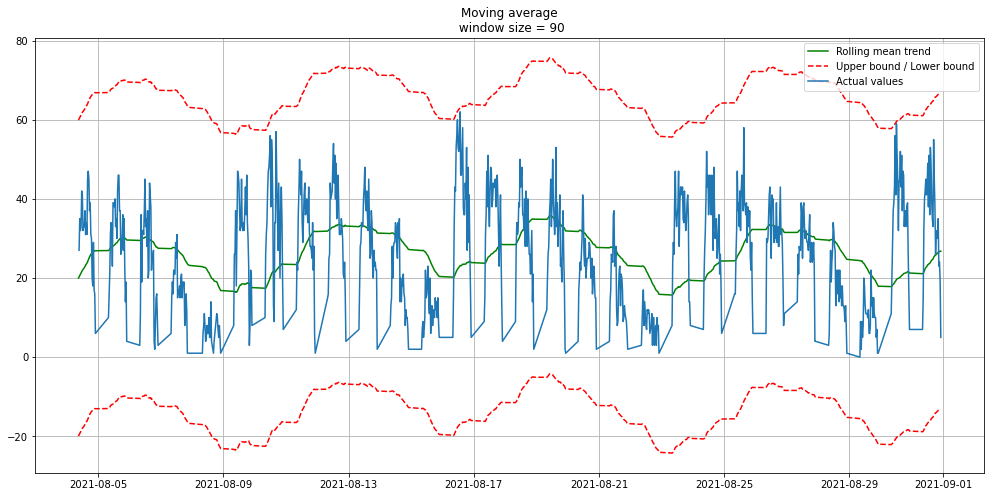

In [23]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(ts, 5)

#Smooth by the previous month (30 days)
plot_moving_average(ts, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(ts, 90, plot_intervals=True)

#### Exponential smothing

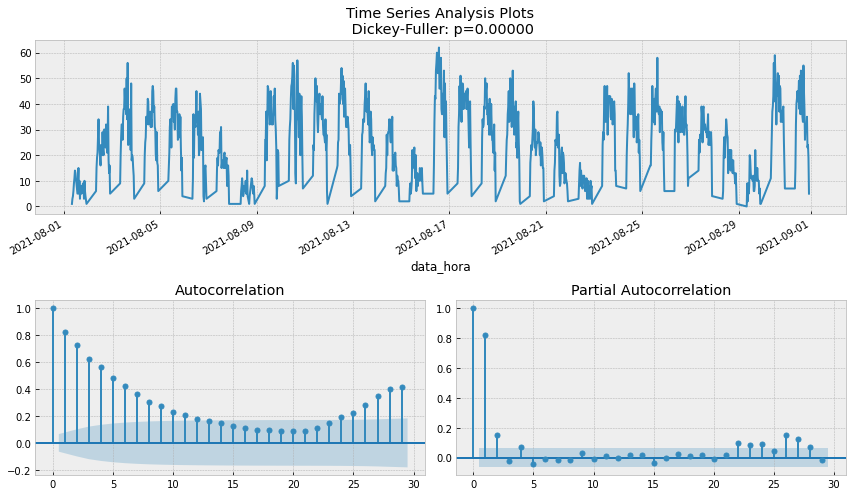

In [24]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(ts, lags=29)

In [57]:
#p olha para o gráfico de PAC
#d olha para a quantidade de diferenciações que aconteceram
#q olha para o gráfico de AC

model = ARIMA(ts, order=(10,0,1))
results_AR = model.fit(disp=0)
model_fit = model.fit()

C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

#### Analisando a viabilidade do modelo

- observar o comportamento do valor p de cada variável:
    - coeficientes pertos de 0 e p value muito acima de 0.05 indicam que o modelo talvez não seja o melhor
- plotar o gráfico com resíduos também e observar se eles não possuem nenhum padrão (ou seja, devem ter média e variância constante)

#### Out of time cross validation

In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals. Para isso, dividimos o df em treino e teste e plotamos um gráfico depois comparando o valor previsto com o real.
- Valores precisam estar dentro do campo de 95% de confiança 
- Caso os valores não sejam satisfatórios, precisa ir adequando os termos do modelo (levando em consideração os gráficos anteriores)
- Modelo precisa dar o menor valor possível de AIC e gráficos que o forecast fica perto dos valores reais
- Enquanto isso, olhar também o p value, que precisam ser perto de zero e menor que 0.05

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

#### Métricas para julgar a eficácia do modelo
- Mape é o principal. 1-mape indica a acurácia para prever os X próximos valores

https://www.youtube.com/watch?v=jGcVQNqNqvY

In [58]:
#modelo com arima(10,0,1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:     ligacoes_recebidas   No. Observations:                  893
Model:                    ARMA(10, 1)   Log Likelihood               -3092.400
Method:                       css-mle   S.D. of innovations              7.716
Date:                Tue, 26 Oct 2021   AIC                           6210.800
Time:                        09:01:52   BIC                           6273.130
Sample:                             0   HQIC                          6234.619
                                                                              
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        25.5798      2.114     12.101      0.000      21.437      29.723
ar.L1.ligacoes_recebidas      1.6196      0.062     26.116      0.000       1.498     

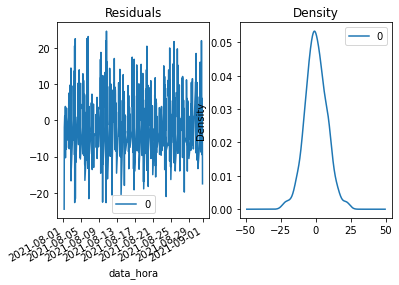

<Figure size 864x360 with 0 Axes>

In [64]:
#resíduos com modelo arima(10,0,1)
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

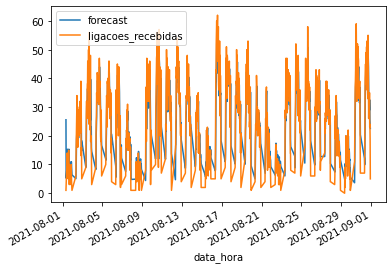

In [60]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

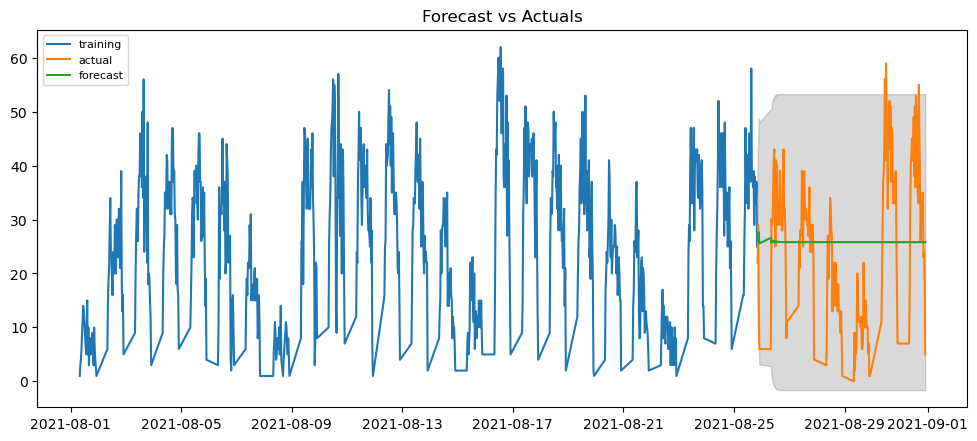

In [61]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(10, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(178, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [74]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape': mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

#tem divisão por 0, pois um horário em específico caíram 0 ligações. Substituir por qual valor? Ou não medir a acurácia dessa forma?

<ipython-input-74-15d1ed1c070c>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
<ipython-input-74-15d1ed1c070c>:5: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


{'mape': inf,
 'me': -0.18095053252312224,
 'mae': 11.469406032125491,
 'mpe': inf,
 'rmse': 13.71722565607892,
 'corr': -0.058171941216532456}

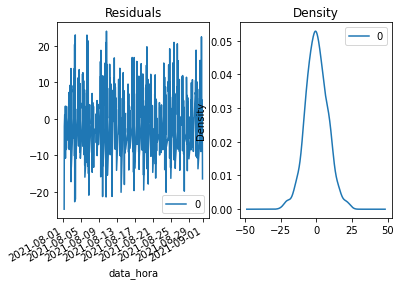

In [55]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

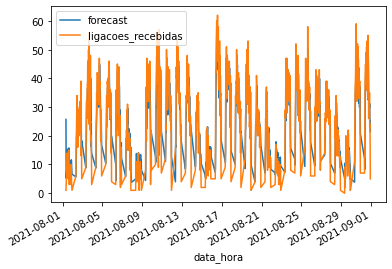

In [56]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [119]:
# Create Training and Test
train = df.ligacoes_recebidas[:536]
test = df.ligacoes_recebidas[536:]

C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

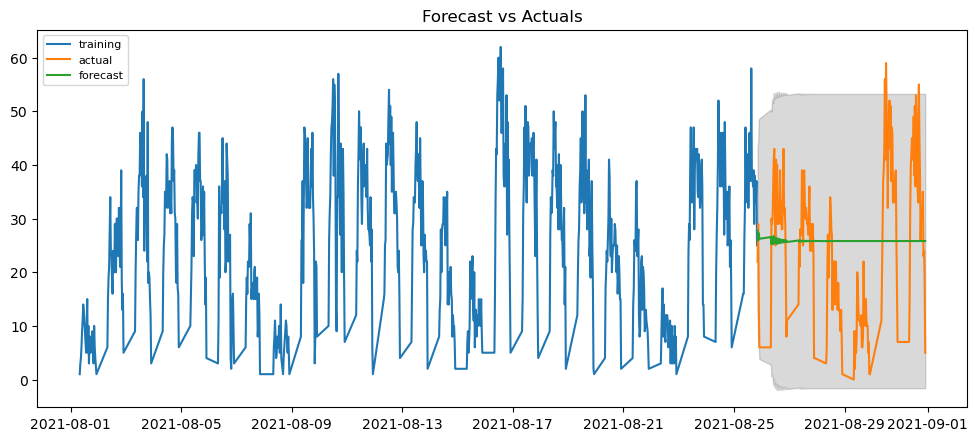

In [130]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(12, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(178, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Auto arima

- Modelo automático para previsões arima e sarimax

In [89]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ts)

#aqui deu que a série é não estacionária, ou seja, precisa de diferenciações

(0.01, False)

In [2]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

axes[0].plot(ts, label='Original Series')
axes[0].plot(ts.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

axes[1].plot(ts, label='Original Series')
axes[1].plot(ts.diff(29), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

NameError: name 'plt' is not defined

In [154]:
model2 = pm.auto_arima(ts,
                      m=29,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[29]             : AIC=inf, Time=25.21 sec
 ARIMA(0,1,0)(0,1,0)[29]             : AIC=6523.161, Time=0.31 sec
 ARIMA(1,1,0)(1,1,0)[29]             : AIC=6178.213, Time=1.80 sec
 ARIMA(0,1,1)(0,1,1)[29]             : AIC=inf, Time=3.44 sec
 ARIMA(1,1,0)(0,1,0)[29]             : AIC=6386.428, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[29]             : AIC=6107.121, Time=4.09 sec
 ARIMA(1,1,0)(2,1,1)[29]             : AIC=inf, Time=22.36 sec
 ARIMA(1,1,0)(1,1,1)[29]             : AIC=inf, Time=8.33 sec
 ARIMA(0,1,0)(2,1,0)[29]             : AIC=6219.609, Time=3.67 sec
 ARIMA(2,1,0)(2,1,0)[29]             : AIC=6087.066, Time=8.36 sec
 ARIMA(2,1,0)(1,1,0)[29]             : AIC=6153.244, Time=2.34 sec
 ARIMA(2,1,0)(2,1,1)[29]             : AIC=inf, Time=23.74 sec
 ARIMA(2,1,0)(1,1,1)[29]             : AIC=inf, Time=11.85 sec
 ARIMA(3,1,0)(2,1,0)[29]             : AIC=6050.199, Time=9.36 sec
 ARIMA(3,1,0)(1,1,0)[29]             : AIC=61

In [163]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(ts, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=2, # maximum p and q
                      m=29,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[29] intercept   : AIC=inf, Time=8.44 sec
 ARIMA(0,0,0)(0,1,0)[29] intercept   : AIC=7082.517, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[29] intercept   : AIC=6225.528, Time=5.91 sec
 ARIMA(0,0,1)(0,1,1)[29] intercept   : AIC=inf, Time=6.97 sec
 ARIMA(0,0,0)(0,1,0)[29]             : AIC=7084.019, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[29] intercept   : AIC=6412.082, Time=1.03 sec
 ARIMA(1,0,0)(2,1,0)[29] intercept   : AIC=6146.131, Time=17.78 sec
 ARIMA(1,0,0)(2,1,1)[29] intercept   : AIC=inf, Time=34.19 sec
 ARIMA(1,0,0)(1,1,1)[29] intercept   : AIC=inf, Time=12.10 sec
 ARIMA(0,0,0)(2,1,0)[29] intercept   : AIC=6995.091, Time=28.22 sec
 ARIMA(2,0,0)(2,1,0)[29] intercept   : AIC=6074.401, Time=26.79 sec
 ARIMA(2,0,0)(1,1,0)[29] intercept   : AIC=6143.190, Time=9.76 sec
 ARIMA(2,0,0)(2,1,1)[29] intercept   : AIC=inf, Time=44.05 sec
 ARIMA(2,0,0)(1,1,1)[29] intercept   : AIC=inf, Time=11.81 sec
 ARIMA(3,0,0)(2,1,0)[29] intercept   : AIC

In [159]:
#modelo SARIMA(1,1,3)(2,1,0)[29]
prediction = pd.DataFrame(model2.predict(n_periods=178), index=test.index)
prediction.columns=['volume previsto']
prediction

,volume previsto
data_hora,
2021-08-25 20:30:00,10.127266
2021-08-25 21:00:00,19.777011
2021-08-25 21:30:00,27.964733
2021-08-25 22:00:00,35.227753
2021-08-26 08:00:00,35.762584
...,...
2021-08-31 20:00:00,24.187631
2021-08-31 20:30:00,28.521648
2021-08-31 21:00:00,37.572734


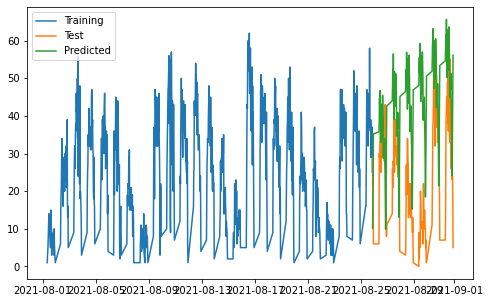

In [161]:
#modelo SARIMA(1,1,3)(2,1,0)[29]

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [165]:
#modelo SARIMA(4,0,0)(2,1,0)[29]
prediction = pd.DataFrame(model.predict(n_periods=178), index=test.index)
prediction.columns=['volume previsto']
prediction

,volume previsto
data_hora,
2021-08-25 20:30:00,9.217490
2021-08-25 21:00:00,18.086371
2021-08-25 21:30:00,26.435540
2021-08-25 22:00:00,33.163830
2021-08-26 08:00:00,33.317612
...,...
2021-08-31 20:00:00,5.520325
2021-08-31 20:30:00,9.317341
2021-08-31 21:00:00,17.916925


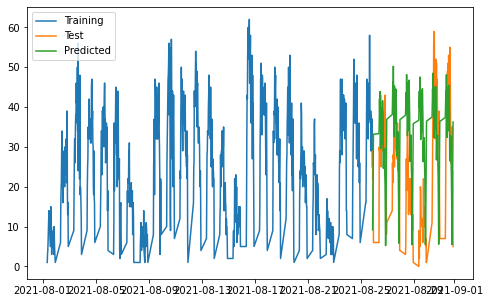

In [166]:
#modelo SARIMA(4,0,0)(2,1,0)[29]

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [1]:
model = pm.auto_arima(ts, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      m=29,             # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,    # No Seasonality
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

NameError: name 'pm' is not defined

In [171]:
#modelo SARIMA(2,1,2)(2,1,0)[29] 
prediction = pd.DataFrame(model.predict(n_periods=178), index=test.index)
prediction.columns=['volume previsto']
prediction

,volume previsto
data_hora,
2021-08-25 20:30:00,10.745740
2021-08-25 21:00:00,19.952327
2021-08-25 21:30:00,28.074601
2021-08-25 22:00:00,35.680319
2021-08-26 08:00:00,36.108904
...,...
2021-08-31 20:00:00,25.553682
2021-08-31 20:30:00,30.215431
2021-08-31 21:00:00,39.025141


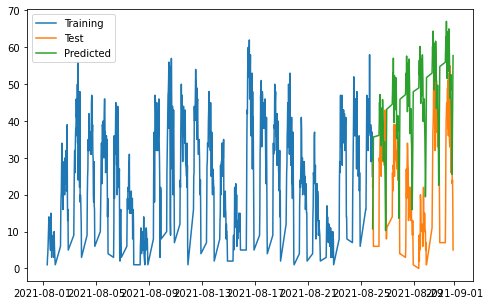

In [172]:
#modelo SARIMA(2,1,2)(2,1,0)[29] 

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.values,trend='add', seasonal='add', seasonal_periods=203).fit()

C:\Users\42220_sarah\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [126]:
test_pred=hwmodel.forecast(357)

In [127]:
forecast = pd.DataFrame(test_pred, index=test.index, columns=['ligacoes'])

<AxesSubplot:xlabel='data_hora'>

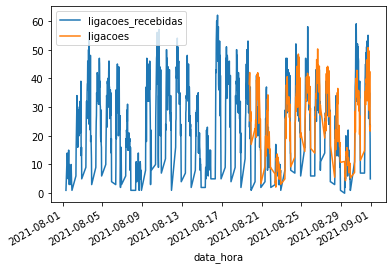

In [128]:
pd.concat([ts, forecast], axis=1).plot()

In [129]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape': mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(test_pred, test.values)

<ipython-input-129-fdd592fb8e8f>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
<ipython-input-129-fdd592fb8e8f>:5: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


{'mape': inf,
 'me': 1.156091465655739,
 'mae': 7.292814163769916,
 'mpe': inf,
 'rmse': 9.28930904508412,
 'corr': 0.7406862481279682}